In [1]:
%run methods.ipynb

C:\Users\andri\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\andri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#Republicanos Donald Trump
list_of_files =['../FicherosJSON//P2REPUBLICANS_10000.json'
               ]
#Un unico dataframe
df = join_all_files_in_one_df(list_of_files)

In [3]:
dataFrames = df[1] 

In [4]:
#DataFrame y numero de tweets deseados 0 para todos los tweets
data = clean_data_from_json(dataFrames[0], 0)

In [5]:
 # return [cleanData, df, numeros_list, popularidad_list, len(numero)]
dataClearData = data[0]
dataDf = data[1]

In [6]:
numeros_list = data[2]
popularidad_list = data[3]
numero = data[4]
print(numero)

10000


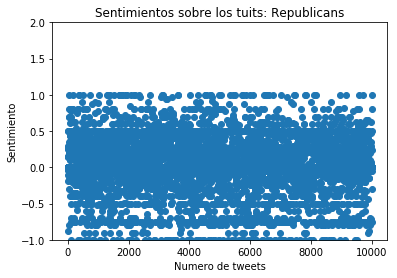

In [7]:
#Dibujar grafica Sentimental
GraficarDatos(numeros_list, popularidad_list, numero, "Sentimientos sobre los tuits: Republicans")


In [7]:
#REALIZAR PARA TODOS
#CREA UN GRAFO DIRIGIDO
#
graph = relaciones_network(dataDf)

numNodes = len(graph.node())
numEdges = len(graph.edges())
#list(nx.chain_decomposition(graph))

In [8]:
sentimentGraphNode = updateSentimentNode(graph)
#print(sentimentGraphNode.node(data=True))

In [9]:
nx.write_graphml(sentimentGraphNode, "theRepublican.graphml")

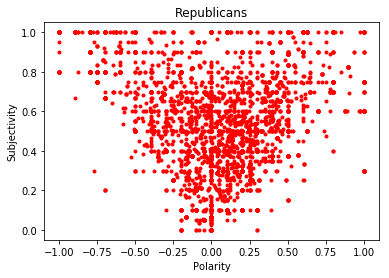

In [43]:
plt.plot(data[5],data[6],'.r')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.title('Republicans')
plt.show()

In [12]:
#PRUEBAS con write_graphml
G = nx.path_graph(3)
print(G.nodes(data=True))

pos = nx.spring_layout(G)
print(pos)

    
nx.write_graphml(G, "g.graphml")

[(0, {}), (1, {}), (2, {})]
{0: array([-1.        ,  0.80930733]), 1: array([ 0.00084447, -0.00068317]), 2: array([ 0.99915553, -0.80862416])}


In [16]:
#Republicans
print(numNodes)
print(numEdges)

20746
47985


In [15]:
#Republicans ASSORTATIVITY
r=nx.degree_assortativity_coefficient(graph)

d=nx.average_neighbor_degree(graph, source='in', target='in')

print(r)
print ('\n')

-0.2841030781317649




In [1]:
#Degree GLOBAL
degreeEachNode=nx.degree(graph)
x = []
for lista, listb in degreeEachNode:
    x.append(listb)
    
#IN-DEGREE
degreeEachNode = nx.in_degree_centrality(graph)
x = degreeEachNode.values()

y = d.values()
plt.loglog(x,y,'.')
plt.xlabel("Grado centralizado de entrada")
plt.show()

#OUT-DEGREE
degreeEachNode = nx.out_degree_centrality(graph)

x = degreeEachNode.values()
y = d.values()

plt.loglog(x,y,'.')
plt.xlabel("Grado centralizado de salida")
plt.show()




NameError: name 'nx' is not defined

In [ ]:
bb = nx.edge_betweenness_centrality(graph, normalized=False)
nx.set_edge_attributes(graph, bb, 'betweenness')


In [ ]:
edges,weights = zip(*nx.get_edge_attributes(graph,'betweenness').items())
pos = nx.spring_layout(graph)
nx.draw(graph, pos, node_color='b', node_size=10 ,edgelist=edges, edge_color=weights, width=2.0, edge_cmap=plt.cm.RdYlGn, with_labels = False)
#nx.write_graphml(graph, "betweenness.graphml", prettyprint=True)

In [ ]:
#Republicans DENSITY
nx.density(graph)

In [ ]:
graph.remove_edges_from(nx.selfloop_edges(graph))
graph = nx.k_core(graph,k=5)

graph = graph.to_undirected()
spring_pos = nx.spring_layout(graph)
edges,weights = zip(*nx.get_edge_attributes(graph,'sentiment').items())

In [ ]:
for node,(x,y) in spring_pos.items():
    graph.node[node]['x'] = float(x)
    graph.node[node]['y'] = float(y)
    

In [ ]:

#pos = nx.spring_layout(graph)
#plt.axis("off")
plt.figure(figsize=(30,30))
spring_pos = nx.spring_layout(graph)
size_node = [val for (node, val) in graph.degree()]
#nx.draw(graph, pos, node_color=sentimentNode, node_size=500 ,edgelist=edges, edge_color='b', width=2.0, edge_cmap=plt.cm.RdYlGn, with_labels = True)
nx.draw_networkx(graph, pos = spring_pos, cmap = plt.get_cmap("jet"), node_color ='r', node_size = size_node, edge_color=weights, edgelist=edges, with_labels = True)
#plt.savefig("graphRepublicsEnlaces.png", dpi=1000)
nx.write_graphml(graph, "semtimentRepublicans.graphml", prettyprint=True)


In [ ]:
#Comunidades 
graph = graph.to_undirected()
c = list(greedy_modularity_communities(graph))

In [ ]:
cadaComunidad = []
numeroDeComunidades = 0
listaDeComunidades = []
dataCadaComunLda=[]
for comunity in c:
    dataParaLDA = []
    sentComunity = [] 
    laComidad = comunity
    for namePerson in laComidad:
        row = df.loc[df['screen_name'] == namePerson]
        tuitLimpio = tweet_clean(row['text'])
        sentComunity.append(sentimentalAnalis(tuitLimpio))
        dataParaLDA.append(tuitLimpio)
    dataCadaComunLda.append(dataParaLDA)
    numeroDeComunidades +=1
    listaDeComunidades.append(numeroDeComunidades)
    cadaComunidad.append(sum(sentComunity)/len(sentComunity))
    
numeroDeComunidades = len(cadaComunidad)
GraficarDatos(listaDeComunidades, cadaComunidad, numeroDeComunidades, "Sentimientos sobre las comunidades en Republics")
    
        

In [ ]:
len(dataCadaComunLda)

In [ ]:
resultData = dict()
varCont = 0
for eachdata in dataCadaComunLda:
    resultData[varCont] = ldaMethod(eachdata, 15)
    varCont +=1
    
